# ÌäπÍ∞ï 02: SupabaseÎ•º ÌôúÏö©Ìïú ÏùåÏõê Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Íµ¨Ï∂ï

## ÌïôÏäµ Î™©Ìëú
- ÌÅ¥ÎùºÏö∞Îìú Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Î•º ÌôúÏö©Ìïú ÏùåÏõê Îç∞Ïù¥ÌÑ∞ Í¥ÄÎ¶¨ ÏãúÏä§ÌÖúÏùÑ Íµ¨Ï∂ïÌï¥Î≥¥Ïûê
- Supabase ÏÑ§Ï†ï Î∞è Ïó∞Îèô Î∞©Î≤ïÏùÑ ÏùµÌòÄÎ≥¥Ïûê
- ÏùåÏõê Ï†ïÎ≥¥ Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÌÖåÏù¥Î∏î ÏÑ§Í≥ÑÎ•º Ïù¥Ìï¥Ìï¥Î≥¥Ïûê
- Spotify APIÏôÄ Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Î•º Ïó∞ÎèôÌïòÏó¨ ÏùåÏõê ÌäπÏÑ±ÏùÑ ÏàòÏßëÌïòÍ≥† Ï†ÄÏû•Ìï¥Î≥¥Ïûê
- Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞Î•º Ï°∞ÌöåÌïòÍ≥† Î∂ÑÏÑùÌïòÎäî Î∞©Î≤ïÏùÑ ÏùµÌòÄÎ≥¥Ïûê

## 1. ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [1]:
import os
import json
import base64
from datetime import datetime
from typing import Dict, List, Optional

import pandas as pd
import numpy as np
import requests
from supabase import create_client, Client
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Ïà®Í∏∞Í∏∞
import warnings
warnings.filterwarnings('ignore')

print("ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî© ÏôÑÎ£å")

ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî© ÏôÑÎ£å


## 2. ÏûêÍ≤© Ï¶ùÎ™Ö ÏÑ§Ï†ï (.env ÌååÏùº)

In [2]:
def load_credentials():
    """.env ÌååÏùºÏóêÏÑú ÏûêÍ≤© Ï¶ùÎ™ÖÏùÑ Î°úÎìúÌïúÎã§."""
    env_file = '.env'
    
    # .env ÌååÏùºÏù¥ ÏóÜÏúºÎ©¥ ÌÖúÌîåÎ¶ø ÏÉùÏÑ±
    if not os.path.exists(env_file):
        template_content = """# Spotify API ÏûêÍ≤© Ï¶ùÎ™Ö
SPOTIFY_CLIENT_ID=your_client_id_here
SPOTIFY_CLIENT_SECRET=your_client_secret_here

# Supabase ÏÑ§Ï†ï
SUPABASE_URL=your_supabase_url_here
SUPABASE_KEY=your_supabase_anon_key_here
"""
        with open(env_file, 'w') as f:
            f.write(template_content)
        
        print(".env ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§!")
        print("Ïã§Ï†ú Í∞íÎì§ÏùÑ ÏûÖÎ†•ÌïòÍ≥† Îã§Ïãú Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî")
        return None, None, None, None
    
    # .env ÌååÏùºÏóêÏÑú ÏùΩÍ∏∞
    client_id = None
    client_secret = None
    supabase_url = None
    supabase_key = None
    
    with open(env_file, 'r') as f:
        for line in f:
            line = line.strip()
            if line and not line.startswith('#') and '=' in line:
                key, value = line.split('=', 1)
                if key == 'SPOTIFY_CLIENT_ID':
                    client_id = value
                elif key == 'SPOTIFY_CLIENT_SECRET':
                    client_secret = value
                elif key == 'SUPABASE_URL':
                    supabase_url = value
                elif key == 'SUPABASE_KEY':
                    supabase_key = value
    
    if (client_id == 'your_client_id_here' or 
        client_secret == 'your_client_secret_here' or
        supabase_url == 'your_supabase_url_here' or
        supabase_key == 'your_supabase_anon_key_here'):
        print("Í≤ΩÍ≥†: .env ÌååÏùºÏóê Ïã§Ï†ú Í∞íÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî!")
        return None, None, None, None
    
    if client_id and client_secret and supabase_url and supabase_key:
        print("ÏûêÍ≤© Ï¶ùÎ™Ö Î°úÎìú ÏôÑÎ£å")
        return client_id, client_secret, supabase_url, supabase_key
    else:
        print("Ïò§Î•ò: .env ÌååÏùºÏóê ÏûêÍ≤© Ï¶ùÎ™ÖÏù¥ ÏóÜÏäµÎãàÎã§.")
        return None, None, None, None

# ÏûêÍ≤© Ï¶ùÎ™Ö Î°úÎìú
SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET, SUPABASE_URL, SUPABASE_KEY = load_credentials()

ÏûêÍ≤© Ï¶ùÎ™Ö Î°úÎìú ÏôÑÎ£å


## 3. Supabase Ïó∞Îèô ÏÑ§Ï†ï

In [3]:
# Supabase ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ï¥àÍ∏∞Ìôî
def init_supabase() -> Client:
    """
    Supabase ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Î•º Ï¥àÍ∏∞ÌôîÌïòÍ≥† Ïó∞Í≤∞ÏùÑ ÌÖåÏä§Ìä∏ÌïúÎã§.
    ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ïó∞Í≤∞ÎêòÎ©¥ ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Í∞ùÏ≤¥Î•º Î∞òÌôòÌïòÍ≥†, Ïã§Ìå®ÌïòÎ©¥ NoneÏùÑ Î∞òÌôòÌïúÎã§.
    """
    if not SUPABASE_URL or not SUPABASE_KEY:
        print("Ïò§Î•ò: .env ÌååÏùºÏóêÏÑú Supabase ÏûêÍ≤© Ï¶ùÎ™ÖÏùÑ Î®ºÏ†Ä ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî!")
        return None
        
    try:
        supabase = create_client(SUPABASE_URL, SUPABASE_KEY)
        print("Supabase Ïó∞Í≤∞ ÏÑ±Í≥µ")
        return supabase
    except Exception as e:
        print(f"Supabase Ïó∞Í≤∞ Ïã§Ìå®: {e}")
        return None

supabase = init_supabase()

Supabase Ïó∞Í≤∞ ÏÑ±Í≥µ


## 4. Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÌÖåÏù¥Î∏î ÏÉùÏÑ±

### 4.1 ÌÖåÏù¥Î∏î ÏÑ§Í≥Ñ

ÏùåÏõê Ï†ïÎ≥¥Î•º Ìö®Ïú®Ï†ÅÏúºÎ°ú Ï†ÄÏû•ÌïòÍ∏∞ ÏúÑÌïú ÌÖåÏù¥Î∏î Íµ¨Ï°∞Î•º ÏÑ§Í≥ÑÌï¥Î≥¥Ïûê.
Í∞Å Ïª¨ÎüºÏùÄ Spotify APIÏóêÏÑú Ï†úÍ≥µÌïòÎäî ÏùåÏõê ÌäπÏÑ±Í≥º Îß§ÌïëÎêòÎ©∞, Ï∂îÍ∞ÄÎ°ú Î©îÌÉÄÎç∞Ïù¥ÌÑ∞Î•º Ìè¨Ìï®ÌïúÎã§.
ÏïÑÎûò SQLÏùÄ Supabase SQL EditorÏóêÏÑú ÏßÅÏ†ë Ïã§ÌñâÌï† Ïàò ÏûàÎã§.

In [4]:
# ÌÖåÏù¥Î∏î ÏÉùÏÑ± SQL (Supabase SQL EditorÏóêÏÑú Ïã§Ìñâ)
create_table_sql = """
-- ÏùåÏõê Ï†ïÎ≥¥ ÌÖåÏù¥Î∏î
CREATE TABLE IF NOT EXISTS tracks (
    id UUID DEFAULT gen_random_uuid() PRIMARY KEY,
    spotify_id VARCHAR(50) UNIQUE NOT NULL,
    name VARCHAR(255) NOT NULL,
    artist VARCHAR(255) NOT NULL,
    album VARCHAR(255),
    release_date DATE,
    duration_ms INTEGER,
    popularity INTEGER,
    preview_url TEXT,
    
    -- Audio Features
    danceability FLOAT,
    energy FLOAT,
    key INTEGER,
    loudness FLOAT,
    mode INTEGER,
    speechiness FLOAT,
    acousticness FLOAT,
    instrumentalness FLOAT,
    liveness FLOAT,
    valence FLOAT,
    tempo FLOAT,
    time_signature INTEGER,
    
    -- Î©îÌÉÄÎç∞Ïù¥ÌÑ∞
    created_at TIMESTAMP WITH TIME ZONE DEFAULT NOW(),
    updated_at TIMESTAMP WITH TIME ZONE DEFAULT NOW(),
    source_type VARCHAR(50) DEFAULT 'manual'
);

-- Ïù∏Îç±Ïä§ ÏÉùÏÑ±
CREATE INDEX idx_tracks_artist ON tracks(artist);
CREATE INDEX idx_tracks_created_at ON tracks(created_at);
CREATE INDEX idx_tracks_popularity ON tracks(popularity);

-- RLS (Row Level Security) ÌôúÏÑ±Ìôî
ALTER TABLE tracks ENABLE ROW LEVEL SECURITY;

-- Î™®Îì† ÏÇ¨Ïö©ÏûêÍ∞Ä ÏùΩÏùÑ Ïàò ÏûàÎèÑÎ°ù Ï†ïÏ±Ö ÏÉùÏÑ±
CREATE POLICY "Enable read access for all users" ON tracks
    FOR SELECT USING (true);

-- Ïù∏Ï¶ùÎêú ÏÇ¨Ïö©ÏûêÎßå ÏÇΩÏûÖÌï† Ïàò ÏûàÎèÑÎ°ù Ï†ïÏ±Ö ÏÉùÏÑ±
CREATE POLICY "Enable insert for authenticated users only" ON tracks
    FOR INSERT WITH CHECK (true);
"""

print("ÏúÑ SQLÏùÑ Supabase SQL EditorÏóêÏÑú Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")
print("Í≤ΩÎ°ú: Supabase Dashboard ‚Üí SQL Editor ‚Üí New Query")

ÏúÑ SQLÏùÑ Supabase SQL EditorÏóêÏÑú Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.
Í≤ΩÎ°ú: Supabase Dashboard ‚Üí SQL Editor ‚Üí New Query


## 5. Spotify API Ïù∏Ï¶ù Î∞è Ìó¨Ìçº Ìï®Ïàò

In [5]:
class SpotifyAPI:
    """Spotify API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏"""
    
    def __init__(self, client_id: str, client_secret: str):
        self.client_id = client_id
        self.client_secret = client_secret
        self.access_token = None
        self.token_expires = 0
    
    def get_access_token(self) -> str:
        """Client Credentials FlowÎ°ú Ïï°ÏÑ∏Ïä§ ÌÜ†ÌÅ∞ ÌöçÎìù"""
        if self.access_token and datetime.now().timestamp() < self.token_expires:
            return self.access_token
        
        auth_str = f"{self.client_id}:{self.client_secret}"
        auth_bytes = auth_str.encode('utf-8')
        auth_base64 = base64.b64encode(auth_bytes).decode('utf-8')
        
        headers = {
            'Authorization': f'Basic {auth_base64}',
            'Content-Type': 'application/x-www-form-urlencoded'
        }
        
        data = {'grant_type': 'client_credentials'}
        
        response = requests.post(
            'https://accounts.spotify.com/api/token',
            headers=headers,
            data=data
        )
        
        if response.status_code == 200:
            token_data = response.json()
            self.access_token = token_data['access_token']
            self.token_expires = datetime.now().timestamp() + token_data['expires_in']
            print("Spotify Ïù∏Ï¶ù ÏÑ±Í≥µ")
            return self.access_token
        else:
            print(f"Spotify Ïù∏Ï¶ù Ïã§Ìå®: {response.status_code}")
            return None
    
    def get_track(self, track_id: str) -> Dict:
        """Ìä∏Îûô Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞"""
        token = self.get_access_token()
        if not token:
            return None
        
        headers = {'Authorization': f'Bearer {token}'}
        url = f'https://api.spotify.com/v1/tracks/{track_id}'
        
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Ìä∏Îûô Ï†ïÎ≥¥ Ï°∞Ìöå Ïã§Ìå®: {response.status_code}")
            return None
    
    def search_track(self, query: str, limit: int = 10) -> List[Dict]:
        """Ìä∏Îûô Í≤ÄÏÉâ"""
        token = self.get_access_token()
        if not token:
            return []
        
        headers = {'Authorization': f'Bearer {token}'}
        params = {
            'q': query,
            'type': 'track',
            'limit': limit
        }
        
        response = requests.get(
            'https://api.spotify.com/v1/search',
            headers=headers,
            params=params
        )
        
        if response.status_code == 200:
            return response.json()['tracks']['items']
        else:
            print(f"Í≤ÄÏÉâ Ïã§Ìå®: {response.status_code}")
            return []


class ReccoBeatsAPI:
    """
    ReccoBeats API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ - Spotify Audio Features API ÎåÄÏ≤¥
    
    2024ÎÖÑ 11Ïõî 27ÏùºÎ∂ÄÌÑ∞ SpotifyÎäî Audio Features API Ï†ëÍ∑ºÏùÑ Ï†úÌïúÌñàÏäµÎãàÎã§.
    ReccoBeats APIÎ•º ÌÜµÌï¥ ÏùåÏõê ÌäπÏÑ±ÏùÑ Î∂ÑÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§.
    """
    
    def __init__(self):
        self.base_url = "https://api.reccobeats.com/v1"
    
    def get_content_id_by_spotify_id(self, spotify_track_id: str) -> Optional[str]:
        """Spotify Ìä∏Îûô IDÎ°ú ReccoBeats content ID Ï°∞Ìöå"""
        try:
            url = f"{self.base_url}/track"
            params = {"ids": spotify_track_id}
            
            response = requests.get(url, params=params, timeout=30)
            
            if response.status_code == 200:
                data = response.json()
                if isinstance(data, dict) and 'content' in data and len(data['content']) > 0:
                    return data['content'][0].get('id')
            return None
            
        except Exception as e:
            print(f"ReccoBeats content ID Ï°∞Ìöå Ïã§Ìå®: {e}")
            return None
    
    def get_audio_features(self, spotify_track_id: str) -> Optional[Dict]:
        """Spotify IDÎ°ú ÏùåÏõê ÌäπÏÑ± Í∞ÄÏ†∏Ïò§Í∏∞ (2Îã®Í≥Ñ ÌîÑÎ°úÏÑ∏Ïä§)"""
        # 1Îã®Í≥Ñ: ReccoBeats content ID Ï°∞Ìöå
        content_id = self.get_content_id_by_spotify_id(spotify_track_id)
        if not content_id:
            print(f"ReccoBeatsÏóêÏÑú Ìä∏ÎûôÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏùå: {spotify_track_id}")
            return None
        
        # 2Îã®Í≥Ñ: ÏùåÏõê ÌäπÏÑ± Ï°∞Ìöå
        try:
            url = f"{self.base_url}/track/{content_id}/audio-features"
            response = requests.get(url, timeout=30)
            
            if response.status_code == 200:
                return response.json()
            else:
                print(f"ÏùåÏõê ÌäπÏÑ± Ï°∞Ìöå Ïã§Ìå®: {response.status_code}")
                return None
                
        except Exception as e:
            print(f"ÏùåÏõê ÌäπÏÑ± API Ìò∏Ï∂ú Ïã§Ìå®: {e}")
            return None

In [6]:
# Spotify API Î∞è ReccoBeats API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ Ï¥àÍ∏∞Ìôî
if SPOTIFY_CLIENT_ID and SPOTIFY_CLIENT_SECRET:
    spotify = SpotifyAPI(SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET)
    reccobeats = ReccoBeatsAPI()
    
    # ÌÖåÏä§Ìä∏: Ïï°ÏÑ∏Ïä§ ÌÜ†ÌÅ∞ ÌöçÎìù
    token = spotify.get_access_token()
    if token:
        print(f"Spotify Ïï°ÏÑ∏Ïä§ ÌÜ†ÌÅ∞: {token[:20]}...")
        print("ReccoBeats API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ÎèÑ Ï§ÄÎπÑ ÏôÑÎ£å")
else:
    print("Î®ºÏ†Ä .env ÌååÏùºÏóê Spotify ÏûêÍ≤© Ï¶ùÎ™ÖÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî!")
    spotify = None
    reccobeats = None

Spotify Ïù∏Ï¶ù ÏÑ±Í≥µ
Spotify Ïï°ÏÑ∏Ïä§ ÌÜ†ÌÅ∞: BQDb6INbnSH9YC6LoknN...
ReccoBeats API ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ÎèÑ Ï§ÄÎπÑ ÏôÑÎ£å


## 6. Îç∞Ïù¥ÌÑ∞ Ï†ÅÏû¨ Ìï®Ïàò Íµ¨ÌòÑ

### 6.1 TrackDatabase ÌÅ¥ÎûòÏä§

Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ÏôÄ Spotify APIÎ•º Ïó∞ÎèôÌïòÏó¨ ÏùåÏõê Ï†ïÎ≥¥Î•º Í¥ÄÎ¶¨ÌïòÎäî ÌÅ¥ÎûòÏä§Î•º Íµ¨ÌòÑÌï¥Î≥¥Ïûê.
Ïù¥ ÌÅ¥ÎûòÏä§Îäî ÏùåÏõê Ï†ïÎ≥¥Ïùò Ï†ÄÏû•, Ï°∞Ìöå, Î∂ÑÏÑù Í∏∞Îä•ÏùÑ Ï†úÍ≥µÌïúÎã§.
Í∞ùÏ≤¥ ÏßÄÌñ• ÌîÑÎ°úÍ∑∏ÎûòÎ∞çÏùÑ ÌÜµÌï¥ ÏΩîÎìúÏùò Ïû¨ÏÇ¨Ïö©ÏÑ±Í≥º Ïú†ÏßÄÎ≥¥ÏàòÏÑ±ÏùÑ ÎÜíÏùº Ïàò ÏûàÎã§.

In [7]:
class TrackDatabase:
    """Ìä∏Îûô Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Í¥ÄÎ¶¨ ÌÅ¥ÎûòÏä§"""
    
    def __init__(self, supabase_client: Client, spotify_client: SpotifyAPI, reccobeats_client: ReccoBeatsAPI):
        self.supabase = supabase_client
        self.spotify = spotify_client
        self.reccobeats = reccobeats_client
    
    def check_existing_tracks(self, spotify_ids: List[str]) -> List[str]:
        """Ïó¨Îü¨ Spotify IDÏùò Ï°¥Ïû¨ Ïó¨Î∂ÄÎ•º Ìïú Î≤àÏóê ÌôïÏù∏"""
        try:
            response = self.supabase.table('tracks').select('spotify_id').in_('spotify_id', spotify_ids).execute()
            existing_ids = [track['spotify_id'] for track in response.data]
            return existing_ids
        except Exception as e:
            print(f"Ï§ëÎ≥µ Ï≤¥ÌÅ¨ Ïã§Ìå®: {e}")
            return []
    
    def check_duplicate_by_name_and_tempo(self, name: str, tempo: float) -> bool:
        """Ïù¥Î¶ÑÍ≥º ÌÖúÌè¨Í∞Ä Î™®Îëê Í∞ôÏùÄ Ìä∏ÎûôÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏"""
        try:
            if tempo is not None:
                # ÌÖúÌè¨Í∞Ä ÏûàÎäî Í≤ΩÏö∞: Ïù¥Î¶ÑÍ≥º ÌÖúÌè¨ Î™®Îëê ÌôïÏù∏
                response = self.supabase.table('tracks').select('spotify_id, name, tempo').eq('name', name).eq('tempo', tempo).execute()
                if response.data:
                    return True
            else:
                # ÌÖúÌè¨Í∞Ä ÏóÜÎäî Í≤ΩÏö∞: Ïù¥Î¶ÑÎßå ÌôïÏù∏ÌïòÎêò ÌÖúÌè¨ÎèÑ NoneÏù∏ Í≤ΩÏö∞Îßå
                response = self.supabase.table('tracks').select('spotify_id, name, tempo').eq('name', name).is_('tempo', 'null').execute()
                if response.data:
                    return True
            
            return False
        except Exception as e:
            print(f"Ïù¥Î¶Ñ/ÌÖúÌè¨ Ï§ëÎ≥µ Ï≤¥ÌÅ¨ Ïã§Ìå®: {e}")
            return False
    
    def save_track_by_id(self, track_id: str, source_type: str = 'manual', skip_without_features: bool = True) -> bool:
        """Spotify IDÎ°ú Ìä∏Îûô Ï†ïÎ≥¥Î•º Í∞ÄÏ†∏ÏôÄÏÑú Ï†ÄÏû•"""
        
        # 1. Spotify IDÎ°ú Ï§ëÎ≥µ ÌôïÏù∏
        existing = self.supabase.table('tracks').select('spotify_id').eq('spotify_id', track_id).execute()
        if existing.data:
            print(f"Ïù¥ÎØ∏ Ï†ÄÏû•Îêú Ìä∏ÎûôÏûÖÎãàÎã§: {track_id}")
            track_info = self.spotify.get_track(track_id)
            if track_info:
                print(f"   ‚Üí {track_info['name']} - {', '.join([a['name'] for a in track_info['artists']])}")
            return False
        
        # Ìä∏Îûô Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
        track_info = self.spotify.get_track(track_id)
        if not track_info:
            print(f"Ìä∏Îûô Ï†ïÎ≥¥Î•º Í∞ÄÏ†∏Ïò¨ Ïàò ÏóÜÏäµÎãàÎã§: {track_id}")
            return False
        
        # ReccoBeats APIÎ°ú Ïò§ÎîîÏò§ ÌäπÏÑ± Í∞ÄÏ†∏Ïò§Í∏∞
        audio_features = self.reccobeats.get_audio_features(track_id)
        
        # Ïò§ÎîîÏò§ ÌäπÏÑ±Ïù¥ ÏóÜÍ≥† skip_without_featuresÍ∞Ä TrueÎ©¥ Ï†ÄÏû•ÌïòÏßÄ ÏïäÏùå
        if not audio_features and skip_without_features:
            print(f"Ïò§ÎîîÏò§ ÌäπÏÑ±Ïù¥ ÏóÜÏñ¥ Í±¥ÎÑàÎúÅÎãàÎã§: {track_info['name']} - {', '.join([a['name'] for a in track_info['artists']])}")
            return False
        
        if not audio_features:
            print(f"Ïò§ÎîîÏò§ ÌäπÏÑ±ÏùÑ Í∞ÄÏ†∏Ïò¨ Ïàò ÏóÜÏäµÎãàÎã§ (ReccoBeatsÏóê ÏóÜÎäî Ìä∏Îûô): {track_id}")
            audio_features = {}
        
        # 2. Ïù¥Î¶ÑÍ≥º ÌÖúÌè¨Î°ú Ï§ëÎ≥µ Ï≤¥ÌÅ¨
        track_name = track_info['name']
        track_tempo = audio_features.get('tempo') if audio_features else None
        
        if self.check_duplicate_by_name_and_tempo(track_name, track_tempo):
            print(f"Ïù¥Î¶ÑÍ≥º ÌÖúÌè¨Í∞Ä Í∞ôÏùÄ Ìä∏ÎûôÏù¥ Ïù¥ÎØ∏ Ï°¥Ïû¨Ìï©ÎãàÎã§!")
            print(f"   Ìä∏Îûô: {track_name}")
            print(f"   ÏïÑÌã∞Ïä§Ìä∏: {', '.join([a['name'] for a in track_info['artists']])}")
            if track_tempo:
                print(f"   ÌÖúÌè¨: {track_tempo:.1f} BPM")
            print(f"   ‚Üí Ï§ëÎ≥µÏúºÎ°ú ÌåêÎã®ÌïòÏó¨ Ï†ÄÏû•ÏùÑ Í±¥ÎÑàÎúÅÎãàÎã§.")
            return False
        
        # Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
        track_data = {
            'spotify_id': track_id,
            'name': track_info['name'],
            'artist': ', '.join([artist['name'] for artist in track_info['artists']]),
            'album': track_info['album']['name'],
            'release_date': track_info['album']['release_date'],
            'duration_ms': track_info['duration_ms'],
            'popularity': track_info['popularity'],
            'preview_url': track_info.get('preview_url'),
            
            # Audio Features (ReccoBeatsÏóêÏÑú Í∞ÄÏ†∏Ïò® Îç∞Ïù¥ÌÑ∞)
            'danceability': audio_features.get('danceability'),
            'energy': audio_features.get('energy'),
            'key': audio_features.get('key'),
            'loudness': audio_features.get('loudness'),
            'mode': audio_features.get('mode'),
            'speechiness': audio_features.get('speechiness'),
            'acousticness': audio_features.get('acousticness'),
            'instrumentalness': audio_features.get('instrumentalness'),
            'liveness': audio_features.get('liveness'),
            'valence': audio_features.get('valence'),
            'tempo': audio_features.get('tempo'),
            'time_signature': audio_features.get('time_signature'),
            
            'source_type': source_type
        }
        
        # Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïóê Ï†ÄÏû•
        try:
            result = self.supabase.table('tracks').insert(track_data).execute()
            print(f"Ï†ÄÏû• ÏôÑÎ£å: {track_info['name']} - {track_data['artist']}")
            return True
        except Exception as e:
            # UNIQUE Ï†úÏïΩ Ï°∞Í±¥ ÏúÑÎ∞ò Ïãú Ï≤òÎ¶¨
            if 'duplicate key' in str(e).lower() or 'unique' in str(e).lower():
                print(f"Ïù¥ÎØ∏ Ï†ÄÏû•Îêú Ìä∏ÎûôÏûÖÎãàÎã§: {track_info['name']} - {track_data['artist']}")
                return False
            else:
                print(f"Ï†ÄÏû• Ïã§Ìå®: {e}")
                return False
    
    def save_tracks_by_search(self, query: str, limit: int = 5, skip_without_features: bool = True) -> int:
        """Í≤ÄÏÉâ Í≤∞Í≥ºÎ°ú Ïó¨Îü¨ Ìä∏Îûô Ï†ÄÏû•"""
        tracks = self.spotify.search_track(query, limit)
        if not tracks:
            print(f"Í≤ÄÏÉâ Í≤∞Í≥ºÍ∞Ä ÏóÜÏäµÎãàÎã§: {query}")
            return 0
        
        # Î™®Îì† Ìä∏Îûô ID Ï∂îÏ∂ú
        track_ids = [track['id'] for track in tracks]
        
        # Ìïú Î≤àÏóê Ï§ëÎ≥µ Ï≤¥ÌÅ¨
        existing_ids = self.check_existing_tracks(track_ids)
        new_tracks = [track for track in tracks if track['id'] not in existing_ids]
        
        if existing_ids:
            print(f"{len(existing_ids)}Í∞ú Ìä∏ÎûôÏù¥ Ïù¥ÎØ∏ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏäµÎãàÎã§")
        
        saved_count = 0
        skipped_count = len(existing_ids)
        
        # ÏÉàÎ°úÏö¥ Ìä∏ÎûôÎßå Ï†ÄÏû•
        for track in new_tracks:
            track_id = track['id']
            result = self.save_track_by_id(track_id, source_type='search', skip_without_features=skip_without_features)
            if result:
                saved_count += 1
        
        print(f"\nÍ≤∞Í≥º: Ï†ÄÏû• {saved_count}Í∞ú / Ï§ëÎ≥µ {skipped_count}Í∞ú / Ï†ÑÏ≤¥ {len(tracks)}Í∞ú")
        return saved_count
    
    def get_all_tracks(self) -> pd.DataFrame:
        """Î™®Îì† Ìä∏Îûô Ï°∞Ìöå"""
        response = self.supabase.table('tracks').select('*').order('created_at', desc=True).execute()
        if response.data:
            return pd.DataFrame(response.data)
        return pd.DataFrame()
    
    def get_tracks_by_artist(self, artist: str) -> pd.DataFrame:
        """ÏïÑÌã∞Ïä§Ìä∏Î≥Ñ Ìä∏Îûô Ï°∞Ìöå"""
        response = self.supabase.table('tracks').select('*').ilike('artist', f'%{artist}%').execute()
        if response.data:
            return pd.DataFrame(response.data)
        return pd.DataFrame()
    
    def get_track_stats(self) -> Dict:
        """Ìä∏Îûô ÌÜµÍ≥Ñ Ï†ïÎ≥¥"""
        df = self.get_all_tracks()
        if df.empty:
            return {}
        
        # NULL Í∞í Ï†úÏô∏ÌïòÍ≥† ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
        stats = {
            'total_tracks': len(df),
            'tracks_with_features': df['energy'].notna().sum() if 'energy' in df else 0,
            'unique_artists': df['artist'].nunique(),
            'avg_popularity': df['popularity'].mean() if 'popularity' in df else 0,
        }
        
        # Ïò§ÎîîÏò§ ÌäπÏÑ± ÌÜµÍ≥Ñ (NULLÏù¥ ÏïÑÎãå Í∞íÎì§Îßå)
        audio_features = ['energy', 'valence', 'tempo', 'danceability']
        for feature in audio_features:
            if feature in df and df[feature].notna().any():
                stats[f'avg_{feature}'] = df[feature].dropna().mean()
            else:
                stats[f'avg_{feature}'] = None
        
        # Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî Ìä∏Îûô
        if 'popularity' in df and not df.empty:
            most_popular = df.nlargest(1, 'popularity')[['name', 'artist', 'popularity']].to_dict('records')
            if most_popular:
                stats['most_popular_track'] = most_popular[0]
        
        return stats

In [8]:
# TrackDatabase Ï¥àÍ∏∞Ìôî
if supabase and spotify and reccobeats:
    track_db = TrackDatabase(supabase, spotify, reccobeats)
    print("TrackDatabase Ï¥àÍ∏∞Ìôî ÏôÑÎ£å")
    print("- Spotify API: Ìä∏Îûô Ï†ïÎ≥¥ Í≤ÄÏÉâ")
    print("- ReccoBeats API: Ïò§ÎîîÏò§ ÌäπÏÑ± Î∂ÑÏÑù") 
    print("- Supabase: Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Î∞è Í¥ÄÎ¶¨")
else:
    print("ÌïÑÏöîÌïú ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏Í∞Ä Ï¥àÍ∏∞ÌôîÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
    track_db = None

TrackDatabase Ï¥àÍ∏∞Ìôî ÏôÑÎ£å
- Spotify API: Ìä∏Îûô Ï†ïÎ≥¥ Í≤ÄÏÉâ
- ReccoBeats API: Ïò§ÎîîÏò§ ÌäπÏÑ± Î∂ÑÏÑù
- Supabase: Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Î∞è Í¥ÄÎ¶¨


## 7. Îç∞Ïù¥ÌÑ∞ Ï†ÅÏû¨ Ïã§Ïäµ

In [ ]:
# ÏòàÏ†ú 1: ÌäπÏ†ï Spotify IDÎ°ú Ìä∏Îûô Ï†ÄÏû•
if track_db:
    sample_track_ids = [
        '3n3Ppam7vgaVa1iaRUc9Lp',  # Mr. Brightside - The Killers
        '4cOdK2wGLETKBW3PvgPWqT',  # Pumped Up Kicks
        '0VjIjW4GlUZAMYd2vXMi3b',  # Blinding Lights - The Weeknd
    ]

    for track_id in sample_track_ids:
        track_db.save_track_by_id(track_id)
        print("-" * 50)
else:
    print("TrackDatabaseÍ∞Ä Ï¥àÍ∏∞ÌôîÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")

In [ ]:
# ÏòàÏ†ú 2: Í≤ÄÏÉâÏúºÎ°ú Ìä∏Îûô Ï†ÄÏû•
if track_db:
    search_queries = [
        "dok2",
        "Paloalto",
        "LOCO",
        "gray",
        "ÏóêÏä§Ìåå",
    ]

    for query in search_queries:
        print(f"\nÍ≤ÄÏÉâ: {query}")
        track_db.save_tracks_by_search(query, limit=15)
        print("=" * 50)
else:
    print("TrackDatabaseÍ∞Ä Ï¥àÍ∏∞ÌôîÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")

## 8. Îç∞Ïù¥ÌÑ∞ Ï°∞Ìöå Î∞è Î∂ÑÏÑù

In [9]:
# Î™®Îì† Ìä∏Îûô Ï°∞Ìöå
if track_db:
    df_tracks = track_db.get_all_tracks()
    print(f"Ï¥ù {len(df_tracks)}Í∞ú Ìä∏ÎûôÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏäµÎãàÎã§")
    df_tracks.head()
else:
    print("TrackDatabaseÍ∞Ä Ï¥àÍ∏∞ÌôîÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
    df_tracks = pd.DataFrame()

Ï¥ù 1000Í∞ú Ìä∏ÎûôÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏäµÎãàÎã§


In [10]:
# ÌÜµÍ≥Ñ Ï†ïÎ≥¥ ÌôïÏù∏
if track_db:
    stats = track_db.get_track_stats()
    if stats:
        print("Ìä∏Îûô Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÌÜµÍ≥Ñ")
        print("=" * 40)
        print(f"Ï¥ù Ìä∏Îûô Ïàò: {stats['total_tracks']}")
        print(f"Í≥†Ïú† ÏïÑÌã∞Ïä§Ìä∏ Ïàò: {stats['unique_artists']}")
        print(f"ÌèâÍ∑† Ïù∏Í∏∞ÎèÑ: {stats['avg_popularity']:.1f}")
        print(f"ÌèâÍ∑† ÏóêÎÑàÏßÄ: {stats['avg_energy']:.2f}")
        print(f"ÌèâÍ∑† Í∏çÏ†ïÎèÑ: {stats['avg_valence']:.2f}")
        print(f"ÌèâÍ∑† ÌÖúÌè¨: {stats['avg_tempo']:.1f} BPM")
        print(f"\nÍ∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî Ìä∏Îûô:")
        print(f"  {stats['most_popular_track']['name']} - {stats['most_popular_track']['artist']}")
        print(f"  Ïù∏Í∏∞ÎèÑ: {stats['most_popular_track']['popularity']}")
else:
    print("TrackDatabaseÍ∞Ä Ï¥àÍ∏∞ÌôîÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")

Ìä∏Îûô Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÌÜµÍ≥Ñ
Ï¥ù Ìä∏Îûô Ïàò: 1000
Í≥†Ïú† ÏïÑÌã∞Ïä§Ìä∏ Ïàò: 429
ÌèâÍ∑† Ïù∏Í∏∞ÎèÑ: 53.0
ÌèâÍ∑† ÏóêÎÑàÏßÄ: 0.66
ÌèâÍ∑† Í∏çÏ†ïÎèÑ: 0.50
ÌèâÍ∑† ÌÖúÌè¨: 122.8 BPM

Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî Ìä∏Îûô:
  DAISIES - Justin Bieber
  Ïù∏Í∏∞ÎèÑ: 93


## 9. Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Í∏∞Î∞ò ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù (EDA)

Ïã§Ï†ú ÏàòÏßëÌïú ÏùåÏõê Îç∞Ïù¥ÌÑ∞Î°ú ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ ÏàòÌñâÌï¥Î≥¥Ïûê.
4Í∞ïÏóêÏÑú ÌïôÏäµÌïú EDA Í∏∞Î≤ïÎì§ÏùÑ Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïóê Ï†ÄÏû•Îêú Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©ÌïúÎã§.

### 9.1 Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Í∏∞Î≥∏ ÌÜµÍ≥Ñ

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Ïò§ÎîîÏò§ ÌäπÏÑ±Ïù¥ ÏôÑÏ†ÑÌïú Ìä∏ÎûôÎßå ÌïÑÌÑ∞ÎßÅ
if not df_tracks.empty:
    audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness']
    
    # NaN Í∞íÏù¥ ÏóÜÎäî Ìä∏ÎûôÎßå ÏÑ†ÌÉù
    df_complete = df_tracks.dropna(subset=audio_features).copy()
    
    print(f"Ï†ÑÏ≤¥ Ìä∏Îûô Ïàò: {len(df_tracks)}")
    print(f"ÏôÑÏ†ÑÌïú Ïò§ÎîîÏò§ ÌäπÏÑ±ÏùÑ Í∞ÄÏßÑ Ìä∏Îûô Ïàò: {len(df_complete)}")
    
    if len(df_complete) > 0:
        # Í∏∞Ïà†ÌÜµÍ≥Ñ
        print("\n=== Ïò§ÎîîÏò§ ÌäπÏÑ± Í∏∞Ïà†ÌÜµÍ≥Ñ ===")
        desc_stats = df_complete[audio_features].describe()
        display(desc_stats.round(3))
        
        # Ï∂îÍ∞Ä ÌÜµÍ≥ÑÎüâ
        print("\n=== Ï∂îÍ∞Ä ÌÜµÍ≥ÑÎüâ ===")
        for feature in audio_features[:5]:  # Ï£ºÏöî ÌäπÏßïÎßå
            data = df_complete[feature]
            print(f"{feature}:")
            print(f"  ÏôúÎèÑ(Skewness): {stats.skew(data):.3f}")
            print(f"  Ï≤®ÎèÑ(Kurtosis): {stats.kurtosis(data):.3f}")
            print(f"  Î≥ÄÎèôÍ≥ÑÏàò(CV): {data.std()/data.mean():.3f}")
    else:
        print("ÏôÑÏ†ÑÌïú Ïò§ÎîîÏò§ ÌäπÏÑ±ÏùÑ Í∞ÄÏßÑ Ìä∏ÎûôÏù¥ ÏóÜÏäµÎãàÎã§.")
else:
    print("Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

Ï†ÑÏ≤¥ Ìä∏Îûô Ïàò: 1000
ÏôÑÏ†ÑÌïú Ïò§ÎîîÏò§ ÌäπÏÑ±ÏùÑ Í∞ÄÏßÑ Ìä∏Îûô Ïàò: 1000

=== Ïò§ÎîîÏò§ ÌäπÏÑ± Í∏∞Ïà†ÌÜµÍ≥Ñ ===


danceability    energy  speechiness  acousticness  instrumentalness  \
count      1000.000  1000.000     1000.000      1000.000          1000.000   
mean          0.591     0.663        0.085         0.281             0.029   
std           0.161     0.209        0.087         0.289             0.140   
min           0.112     0.004        0.022         0.000             0.000   
25%           0.481     0.517        0.034         0.032             0.000   
50%           0.595     0.695        0.048         0.164             0.000   
75%           0.718     0.832        0.096         0.482             0.000   
max           0.949     0.999        0.930         0.995             0.934   

       liveness   valence     tempo  loudness  
count  1000.000  1000.000  1000.000  1000.000  
mean      0.190     0.495   122.802    -6.168  
std       0.158     0.245    28.174     3.190  
min       0.023     0.035    59.989   -30.628  
25%       0.093     0.290    99.994    -7.446  
50%       0.123     0.497   123.778    -5.515  
75%       0.242     0.696   140.026    -4.090  
max       0.983     0.975   204.037    -0.140


=== Ï∂îÍ∞Ä ÌÜµÍ≥ÑÎüâ ===
danceability:
  ÏôúÎèÑ(Skewness): -0.169
  Ï≤®ÎèÑ(Kurtosis): -0.518
  Î≥ÄÎèôÍ≥ÑÏàò(CV): 0.272
energy:
  ÏôúÎèÑ(Skewness): -0.571
  Ï≤®ÎèÑ(Kurtosis): -0.416
  Î≥ÄÎèôÍ≥ÑÏàò(CV): 0.316
speechiness:
  ÏôúÎèÑ(Skewness): 2.894
  Ï≤®ÎèÑ(Kurtosis): 13.090
  Î≥ÄÎèôÍ≥ÑÏàò(CV): 1.027
acousticness:
  ÏôúÎèÑ(Skewness): 0.871
  Ï≤®ÎèÑ(Kurtosis): -0.543
  Î≥ÄÎèôÍ≥ÑÏàò(CV): 1.028
instrumentalness:
  ÏôúÎèÑ(Skewness): 5.289
  Ï≤®ÎèÑ(Kurtosis): 27.310
  Î≥ÄÎèôÍ≥ÑÏàò(CV): 4.784


### 9.2 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

ÏùåÏõê ÌäπÏÑ±Îì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌïòÏó¨ Ïñ¥Îñ§ ÌäπÏÑ±Îì§Ïù¥ ÏÑúÎ°ú Ïó∞Í¥ÄÎêòÏñ¥ ÏûàÎäîÏßÄ ÌååÏïÖÌï¥Î≥¥Ïûê.
ÏòàÎ•º Îì§Ïñ¥ ÏóêÎÑàÏßÄÍ∞Ä ÎÜíÏùÄ Í≥°ÏùÄ ÎåÑÏÑúÎπåÎ¶¨Ìã∞ÎèÑ ÎÜíÏùÑÍπå? Ïñ¥Ïø†Ïä§Ìã±Ìïú Í≥°ÏùÄ ÏóêÎÑàÏßÄÍ∞Ä ÎÇÆÏùÑÍπå?
Ïù¥Îü∞ Í¥ÄÍ≥ÑÎ•º ÏïåÎ©¥ Ï§ëÎ≥µÎêòÎäî ÌäπÏßïÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò, ÏÉàÎ°úÏö¥ ÌäπÏßïÏùÑ ÎßåÎì§ ÏïÑÏù¥ÎîîÏñ¥Î•º ÏñªÏùÑ Ïàò ÏûàÎã§.

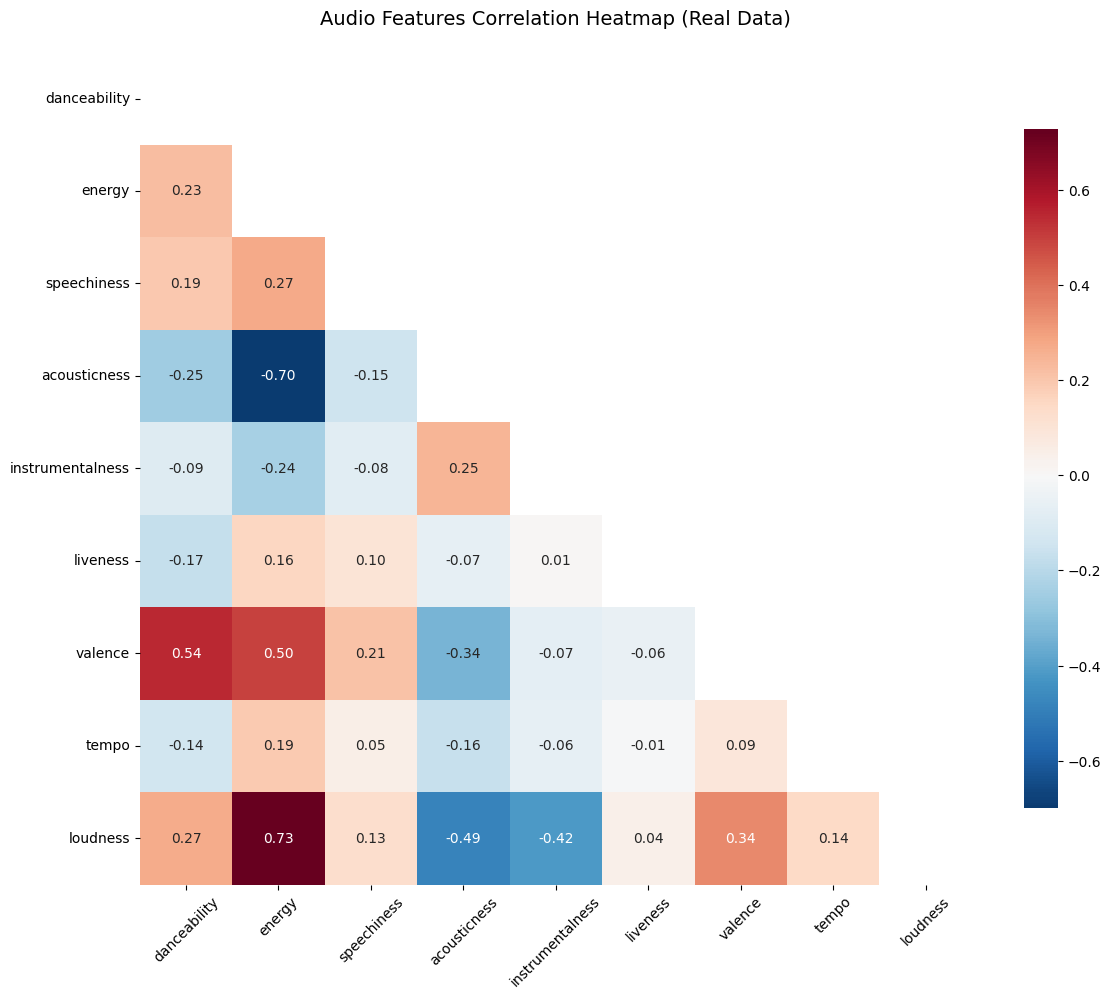

üîç Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| > 0.5):
  danceability ‚Üî valence: 0.545
  energy ‚Üî acousticness: -0.699
  energy ‚Üî loudness: 0.728


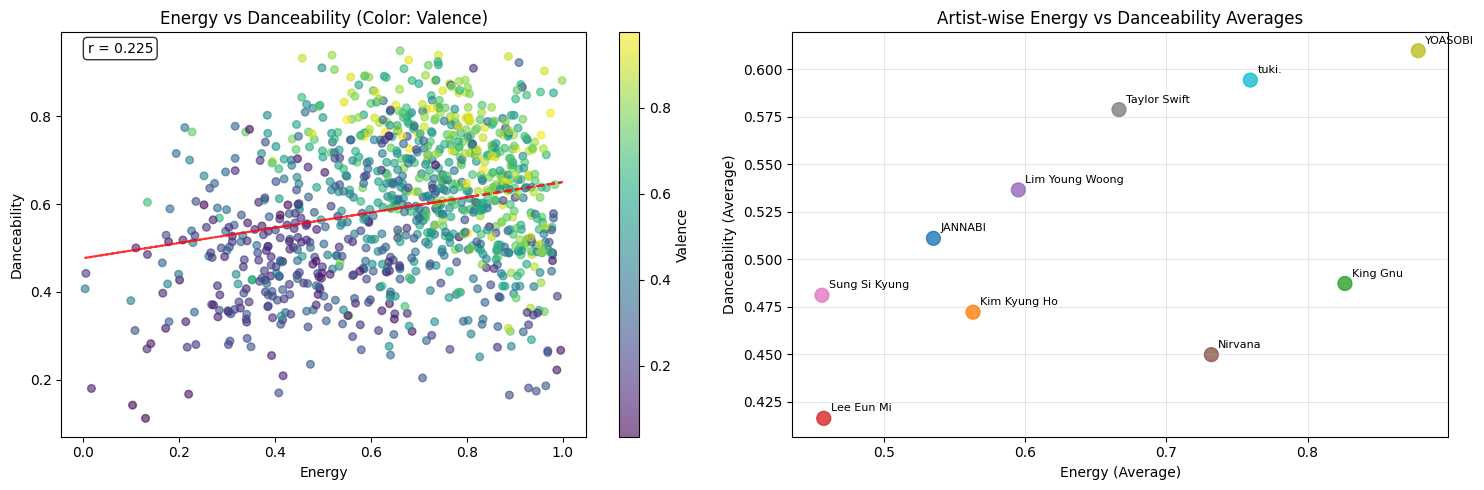

In [14]:
if len(df_complete) > 10:
    # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
    correlation_matrix = df_complete[audio_features].corr()
    
    # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # ÏÉÅÏÇºÍ∞Å ÎßàÏä§ÌÅ¨
    
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                fmt='.2f',
                square=True,
                cbar_kws={"shrink": .8})
    
    plt.title('Audio Features Correlation Heatmap (Real Data)', fontsize=14, pad=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï∞æÍ∏∞
    print("üîç Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| > 0.5):")
    strong_corr = []
    
    for i in range(len(audio_features)):
        for j in range(i+1, len(audio_features)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_corr.append((audio_features[i], audio_features[j], corr_val))
                print(f"  {audio_features[i]} ‚Üî {audio_features[j]}: {corr_val:.3f}")
    
    if not strong_corr:
        print("  Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Î∞úÍ≤¨ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")
    
    # ÌäπÏ†ï Í¥ÄÍ≥Ñ Ïã¨Ï∏µ Î∂ÑÏÑù: Energy vs Danceability
    if 'energy' in df_complete.columns and 'danceability' in df_complete.columns:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # ÏÇ∞Ï†êÎèÑ
        scatter = axes[0].scatter(df_complete['energy'], df_complete['danceability'], 
                                 c=df_complete['valence'], cmap='viridis', alpha=0.6, s=30)
        axes[0].set_xlabel('Energy')
        axes[0].set_ylabel('Danceability')
        axes[0].set_title('Energy vs Danceability (Color: Valence)')
        plt.colorbar(scatter, ax=axes[0], label='Valence')
        
        # ÌöåÍ∑ÄÏÑ† Ï∂îÍ∞Ä
        z = np.polyfit(df_complete['energy'], df_complete['danceability'], 1)
        p = np.poly1d(z)
        axes[0].plot(df_complete['energy'], p(df_complete['energy']), "r--", alpha=0.8)
        
        # ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌëúÏãú
        r_value = df_complete['energy'].corr(df_complete['danceability'])
        axes[0].text(0.05, 0.95, f'r = {r_value:.3f}', transform=axes[0].transAxes, 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # ÏïÑÌã∞Ïä§Ìä∏Î≥Ñ ÌèâÍ∑†Í∞í (ÏÉÅÏúÑ 10Î™Ö)
        artist_counts = df_complete['artist'].value_counts()
        top_artists = artist_counts.head(10).index
        df_top_artists = df_complete[df_complete['artist'].isin(top_artists)]
        
        if len(df_top_artists) > 0:
            artist_means = df_top_artists.groupby('artist')[['energy', 'danceability']].mean()
            axes[1].scatter(artist_means['energy'], artist_means['danceability'], 
                           s=100, alpha=0.8, c=range(len(artist_means)), cmap='tab10')
            
            for i, (artist, row) in enumerate(artist_means.iterrows()):
                # Í∏¥ ÏïÑÌã∞Ïä§Ìä∏ Ïù¥Î¶ÑÏùÄ Ï§ÑÏó¨ÏÑú ÌëúÏãú
                display_name = artist[:15] + '...' if len(artist) > 15 else artist
                axes[1].annotate(display_name, 
                                (row['energy'], row['danceability']),
                                xytext=(5, 5), textcoords='offset points', fontsize=8)
            
            axes[1].set_xlabel('Energy (Average)')
            axes[1].set_ylabel('Danceability (Average)')
            axes[1].set_title('Artist-wise Energy vs Danceability Averages')
            axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
else:
    print("ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

### 9.3 Ïù¥ÏÉÅÏπò ÌÉêÏßÄ

Ïù¥ÏÉÅÏπò(outlier)Îäî Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌòÑÏ†ÄÌûà Îã§Î•∏ Í∞íÎì§Ïù¥Îã§. Ïã§Ï†ú ÏùåÏõê Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïù¥ÏÉÅÏπòÎ•º Ï∞æÏïÑÎ≥¥Ïûê.
ÏòàÎ•º Îì§Ïñ¥ ÌÖúÌè¨Í∞Ä Í∑πÎã®Ï†ÅÏúºÎ°ú Îπ†Î•¥Í±∞ÎÇò ÎäêÎ¶∞ Í≥°, ÏóêÎÑàÏßÄÏôÄ ÎåÑÏÑúÎπåÎ¶¨Ìã∞Í∞Ä ÌäπÏù¥Ìïú Ï°∞Ìï©ÏùÑ Í∞ÄÏßÑ Í≥° Îì±ÏùÑ Ï∞æÏùÑ Ïàò ÏûàÎã§.

#### IQR Î∞©Î≤ï
**IQR(Interquartile Range)**ÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÍ∞Ñ 50%Í∞Ä ÌçºÏ†∏ÏûàÎäî Î≤îÏúÑÎã§.
- Q1(1ÏÇ¨Î∂ÑÏúÑÏàò): ÌïòÏúÑ 25% ÏßÄÏ†ê
- Q3(3ÏÇ¨Î∂ÑÏúÑÏàò): ÏÉÅÏúÑ 25% ÏßÄÏ†ê  
- IQR = Q3 - Q1
- Ïù¥ÏÉÅÏπò Í∏∞Ï§Ä: Q1 - 1.5√óIQR ÎØ∏Îßå ÎòêÎäî Q3 + 1.5√óIQR Ï¥àÍ≥º
- üí° Î∞ïÏä§ÌîåÎ°ØÏùò ÏàòÏóºÏùÑ Î≤óÏñ¥ÎÇòÎäî Ï†êÎì§Ïù¥ Î∞îÎ°ú IQR Ïù¥ÏÉÅÏπò!

#### Z-score Î∞©Î≤ï
**Z-score**Îäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÌèâÍ∑†ÏóêÏÑú ÏñºÎßàÎÇò Îñ®Ïñ¥Ï†∏ ÏûàÎäîÏßÄÎ•º ÌëúÏ§ÄÌé∏Ï∞® Îã®ÏúÑÎ°ú ÌëúÌòÑÌïúÎã§.
- Z-score = (Í∞í - ÌèâÍ∑†) / ÌëúÏ§ÄÌé∏Ï∞®
- Ïù¥ÏÉÅÏπò Í∏∞Ï§Ä: |Z-score| > 3 (ÌèâÍ∑†ÏóêÏÑú 3 ÌëúÏ§ÄÌé∏Ï∞® Ïù¥ÏÉÅ Îñ®Ïñ¥ÏßÑ Í∞í)
- üí° Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú 99.7%Ïùò Îç∞Ïù¥ÌÑ∞Îäî ¬±3œÉ ÏïàÏóê ÏûàÏúºÎØÄÎ°ú, Í∑∏ Î∞ñÏùò 0.3%Î•º Ïù¥ÏÉÅÏπòÎ°ú Î≥∏Îã§.

Îëê Î∞©Î≤ïÏùò Ï∞®Ïù¥:
- **IQR**: Î∂ÑÌè¨ ÌòïÌÉúÏóê Í¥ÄÍ≥ÑÏóÜÏù¥ ÏÇ¨Ïö© Í∞ÄÎä•, Í∑πÎã®Í∞íÏóê Îçú ÎØºÍ∞ê
- **Z-score**: Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ï, ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Ïóê ÎØºÍ∞ê

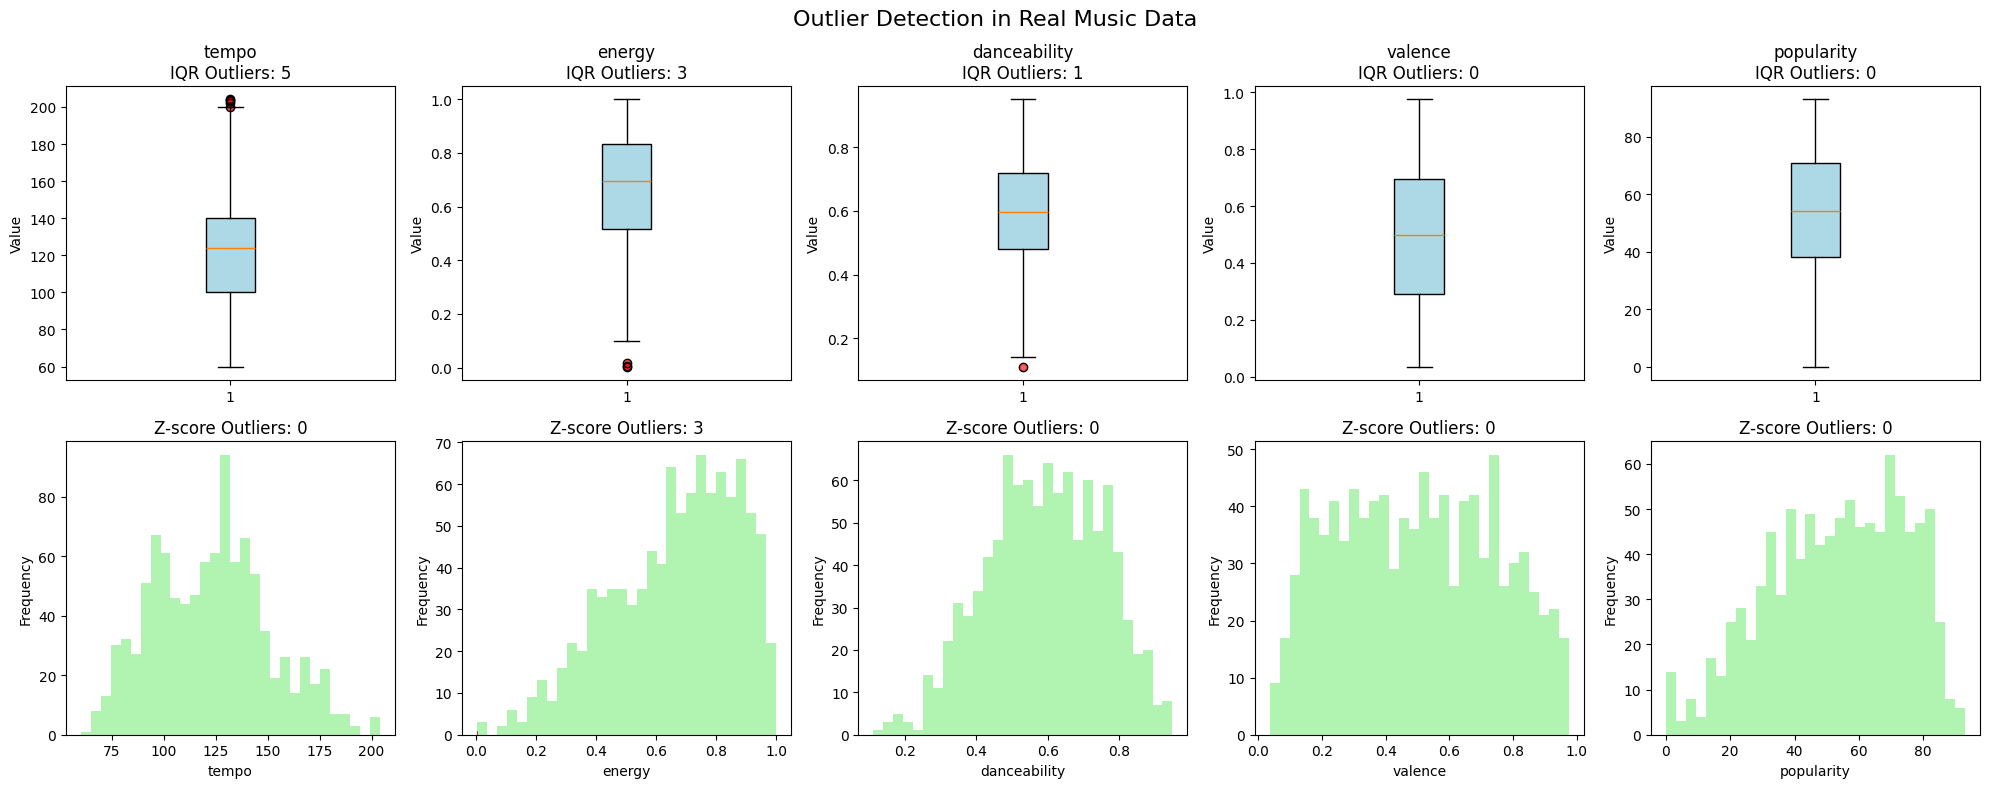

üö® Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Í≤∞Í≥º:
ÌäπÏßï		IQR Î∞©Î≤ï	Z-score Î∞©Î≤ï
----------------------------------------
tempo               5Í∞ú	       0Í∞ú
energy              3Í∞ú	       3Í∞ú
danceability        1Í∞ú	       0Í∞ú
valence             0Í∞ú	       0Í∞ú
popularity          0Í∞ú	       0Í∞ú

üîç Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Í≤∞Í≥º:
  Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞: 1000Í∞ú
  Ïù¥ÏÉÅÏπò: 50Í∞ú (5.0%)
  Ï†ïÏÉÅÏπò: 950Í∞ú (95.0%)

üéµ Ïù¥ÏÉÅÏπòÎ°ú ÌÉêÏßÄÎêú Í≥°Îì§ (ÏÉÅÏúÑ 5Í∞ú):
  - Graceful Rhapsody by Velvet Groove
    Tempo: 96.4, Energy: 0.18, Danceability: 0.51
  - „Åï„Åè„Çâ - Áã¨Âî± by Naotaro Moriyama
    Tempo: 72.0, Energy: 0.18, Danceability: 0.59
  - butterflies (feat. TAEHYUN & Kim Chaewon of LE SSERAFIM) by JVKE, TOMORROW X TOGETHER, LE SSERAFIM, TAEHYUN, KIM CHAEWON
    Tempo: 202.3, Energy: 0.78, Danceability: 0.50
  - ÏïÑ Î™©ÎèôÏïÑ by Ïò§Î•¥Í≥®
    Tempo: 93.5, Energy: 0.28, Danceability: 0.57
  - Unread Message by Lim Young Woong
    Tempo: 199.9, Energy: 0.58, Danceability: 0.64


In [15]:
if len(df_complete) > 10:
    def detect_outliers_iqr(data, column):
        """IQR Î∞©Î≤ïÏúºÎ°ú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ"""
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        return outliers, lower_bound, upper_bound
    
    def detect_outliers_zscore(data, column, threshold=3):
        """Z-score Î∞©Î≤ïÏúºÎ°ú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ"""
        z_scores = np.abs(stats.zscore(data[column]))
        outliers = data[z_scores > threshold]
        return outliers
    
    # Ï£ºÏöî ÌäπÏßïÎì§Ïùò Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
    outlier_features = ['tempo', 'energy', 'danceability', 'valence', 'popularity']
    
    fig, axes = plt.subplots(2, len(outlier_features), figsize=(20, 8))
    fig.suptitle('Outlier Detection in Real Music Data', fontsize=16)
    
    outlier_summary = {}
    
    for i, feature in enumerate(outlier_features):
        if feature in df_complete.columns:
            # IQR Î∞©Î≤ï
            iqr_outliers, lower, upper = detect_outliers_iqr(df_complete, feature)
            
            # Z-score Î∞©Î≤ï
            zscore_outliers = detect_outliers_zscore(df_complete, feature)
            
            outlier_summary[feature] = {
                'IQR': len(iqr_outliers),
                'Z-score': len(zscore_outliers)
            }
            
            # Î∞ïÏä§ÌîåÎ°Ø (IQR Ïù¥ÏÉÅÏπò ÌëúÏãú)
            bp1 = axes[0, i].boxplot(df_complete[feature], patch_artist=True)
            bp1['boxes'][0].set_facecolor('lightblue')
            axes[0, i].scatter(np.ones(len(iqr_outliers)), iqr_outliers[feature], 
                              color='red', alpha=0.6, s=20)
            axes[0, i].set_title(f'{feature}\nIQR Outliers: {len(iqr_outliers)}')
            axes[0, i].set_ylabel('Value')
            
            # ÌûàÏä§ÌÜ†Í∑∏Îû® (Z-score Ïù¥ÏÉÅÏπò ÌëúÏãú)
            axes[1, i].hist(df_complete[feature], bins=30, alpha=0.7, color='lightgreen')
            if len(zscore_outliers) > 0:
                axes[1, i].hist(zscore_outliers[feature], bins=30, alpha=0.8, color='red')
            axes[1, i].set_title(f'Z-score Outliers: {len(zscore_outliers)}')
            axes[1, i].set_xlabel(feature)
            axes[1, i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Ïù¥ÏÉÅÏπò ÏöîÏïΩ
    print("üö® Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Í≤∞Í≥º:")
    print("ÌäπÏßï\t\tIQR Î∞©Î≤ï\tZ-score Î∞©Î≤ï")
    print("-" * 40)
    for feature in outlier_features:
        if feature in outlier_summary:
            iqr_count = outlier_summary[feature]['IQR']
            zscore_count = outlier_summary[feature]['Z-score']
            print(f"{feature:<15}{iqr_count:>6}Í∞ú\t{zscore_count:>8}Í∞ú")
    
    # Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÏπò ÌÉêÏßÄ (Isolation Forest)
    from sklearn.ensemble import IsolationForest
    from sklearn.preprocessing import StandardScaler
    
    # Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÏπò ÌÉêÏßÄÎ•º ÏúÑÌïú ÌäπÏßï ÏÑ†ÌÉù
    multi_features = ['tempo', 'energy', 'danceability', 'valence', 'acousticness']
    available_features = [f for f in multi_features if f in df_complete.columns]
    
    if len(available_features) >= 3:
        X = df_complete[available_features].values
        
        # Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Isolation ForestÎ°ú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
        iso_forest = IsolationForest(contamination=0.05, random_state=42)
        outlier_labels = iso_forest.fit_predict(X_scaled)
        
        # Ïù¥ÏÉÅÏπòÏôÄ Ï†ïÏÉÅÏπò Î∂ÑÎ¶¨
        df_with_outliers = df_complete.copy()
        df_with_outliers['is_outlier'] = outlier_labels == -1
        
        outliers_multi = df_with_outliers[df_with_outliers['is_outlier']]
        normal_data = df_with_outliers[~df_with_outliers['is_outlier']]
        
        print(f"\nüîç Îã§Î≥ÄÎüâ Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Í≤∞Í≥º:")
        print(f"  Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞: {len(df_complete)}Í∞ú")
        print(f"  Ïù¥ÏÉÅÏπò: {len(outliers_multi)}Í∞ú ({len(outliers_multi)/len(df_complete)*100:.1f}%)")
        print(f"  Ï†ïÏÉÅÏπò: {len(normal_data)}Í∞ú ({len(normal_data)/len(df_complete)*100:.1f}%)")
        
        if len(outliers_multi) > 0:
            print(f"\nüéµ Ïù¥ÏÉÅÏπòÎ°ú ÌÉêÏßÄÎêú Í≥°Îì§ (ÏÉÅÏúÑ 5Í∞ú):")
            for idx, row in outliers_multi.head(5).iterrows():
                print(f"  - {row['name']} by {row['artist']}")
                if 'tempo' in row:
                    print(f"    Tempo: {row['tempo']:.1f}, Energy: {row['energy']:.2f}, Danceability: {row['danceability']:.2f}")
else:
    print("Ïù¥ÏÉÅÏπò ÌÉêÏßÄÎ•º ÏúÑÌïú Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

## 10. Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î°ú PCA Î∂ÑÏÑùÌïòÍ∏∞

### 10.1 PCAÏùò ÌïÑÏöîÏÑ±

Ïö∞Î¶¨Í∞Ä ÏàòÏßëÌïú ÏùåÏõê Îç∞Ïù¥ÌÑ∞ÏóêÎäî 8Í∞úÏùò Ïò§ÎîîÏò§ ÌäπÏÑ±Ïù¥ ÏûàÎã§:
- danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence, tempo

Ïù¥Î†áÍ≤å ÎßéÏùÄ ÌäπÏÑ±ÏùÑ Ìïú Î≤àÏóê ÏãúÍ∞ÅÌôîÌïòÍ≥† Î∂ÑÏÑùÌïòÎäî Í≤ÉÏùÄ Ïñ¥Î†µÎã§.
PCA(Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù)Î•º ÏÇ¨Ïö©ÌïòÎ©¥ Ïù¥ 8Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞Î•º 2Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜåÌïòÏó¨ Ï†ÑÏ≤¥Ï†ÅÏù∏ Ìå®ÌÑ¥ÏùÑ ÌååÏïÖÌï† Ïàò ÏûàÎã§.

In [24]:
# PCAÎ•º ÏúÑÌïú Ï∂îÍ∞Ä ÎùºÏù¥Î∏åÎü¨Î¶¨ import
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ïò§ÎîîÏò§ ÌäπÏÑ±Ïù¥ ÏôÑÏ†ÑÌïú Ìä∏ÎûôÎßå ÌïÑÌÑ∞ÎßÅ (PCAÏö©)
if not df_tracks.empty:
    pca_features = ['danceability', 'energy', 'speechiness', 'acousticness', 
                    'instrumentalness', 'liveness', 'valence', 'tempo']
    
    # NaN Í∞íÏù¥ ÏóÜÎäî Ìä∏ÎûôÎßå ÏÑ†ÌÉù
    df_pca = df_tracks.dropna(subset=pca_features).copy()
    
    print(f"PCA Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞:")
    print(f"  Ï†ÑÏ≤¥ Ìä∏Îûô Ïàò: {len(df_tracks)}")
    print(f"  ÏôÑÏ†ÑÌïú Ïò§ÎîîÏò§ ÌäπÏÑ±ÏùÑ Í∞ÄÏßÑ Ìä∏Îûô Ïàò: {len(df_pca)}")
    
    if len(df_pca) > 0:
        print(f"\nÏÉòÌîå Îç∞Ïù¥ÌÑ∞:")
        display(df_pca[['name', 'artist'] + pca_features].head())
    else:
        print("ÏôÑÏ†ÑÌïú Ïò§ÎîîÏò§ ÌäπÏÑ±ÏùÑ Í∞ÄÏßÑ Ìä∏ÎûôÏù¥ ÏóÜÏäµÎãàÎã§.")
else:
    print("Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
    df_pca = pd.DataFrame()

PCA Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞:
  Ï†ÑÏ≤¥ Ìä∏Îûô Ïàò: 1000
  ÏôÑÏ†ÑÌïú Ïò§ÎîîÏò§ ÌäπÏÑ±ÏùÑ Í∞ÄÏßÑ Ìä∏Îûô Ïàò: 1000

ÏÉòÌîå Îç∞Ïù¥ÌÑ∞:


name  \
0  WITCH (Feat. Jay Park, So!YoON!) (Prod. by Slom)   
1                                           Trouble   
2                                            My cat   
3                                         Fraktsiya   
4                              ADHD (feat. Jambino)   

                             artist  danceability  energy  speechiness  \
0  Lee Young Ji, Jay Park, So!YoON!         0.909   0.814       0.1750   
1         Christopher, Lee Young Ji         0.652   0.752       0.3340   
2                      Lee Young Ji         0.808   0.685       0.0615   
3                MARK, Lee Young Ji         0.765   0.726       0.1890   
4             Lee Young Ji, Jambino         0.889   0.558       0.0550   

   acousticness  instrumentalness  liveness  valence    tempo  
0       0.09790          0.000143    0.0875    0.158  109.999  
1       0.10200          0.000002    0.0979    0.887   96.215  
2       0.35500          0.000000    0.2200    0.441   94.015  
3       0.00262          0.000000    0.0718    0.568  152.049  
4       0.18200          0.000000    0.0437    0.914   92.006

### 10.2 Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Ï†ïÍ∑úÌôî

Ï†ïÍ∑úÌôî Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:
ÌèâÍ∑†: [5.91000e-01 6.63000e-01 8.50000e-02 2.81000e-01 2.90000e-02 1.90000e-01
 4.95000e-01 1.22802e+02]
ÌëúÏ§ÄÌé∏Ï∞®: [ 0.161  0.209  0.087  0.289  0.14   0.158  0.245 28.16 ]

Ï†ïÍ∑úÌôî ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:
ÌèâÍ∑†: [-0.  0.  0. -0. -0.  0. -0.  0.]
ÌëúÏ§ÄÌé∏Ï∞®: [1. 1. 1. 1. 1. 1. 1. 1.]


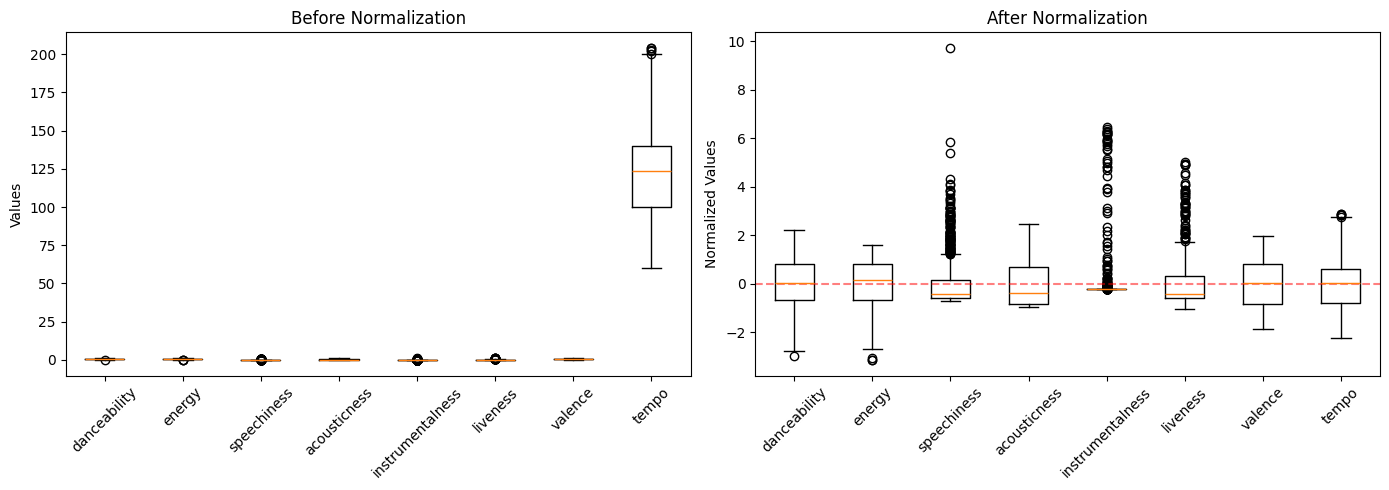

Ï†ïÍ∑úÌôî ÏôÑÎ£å: Ïù¥Ï†ú Î™®Îì† ÌäπÏÑ±Ïù¥ Í∞ôÏùÄ Ïä§ÏºÄÏùºÏùÑ Í∞ÄÏßëÎãàÎã§


In [25]:
if len(df_pca) > 10:  # Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùÑ ÎïåÎßå ÏßÑÌñâ
    # Ïò§ÎîîÏò§ ÌäπÏÑ± Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    X = df_pca[pca_features].values
    
    print("Ï†ïÍ∑úÌôî Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:")
    print(f"ÌèâÍ∑†: {X.mean(axis=0).round(3)}")
    print(f"ÌëúÏ§ÄÌé∏Ï∞®: {X.std(axis=0).round(3)}")
    
    # StandardScalerÎ°ú Ï†ïÍ∑úÌôî
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print("\nÏ†ïÍ∑úÌôî ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:")
    print(f"ÌèâÍ∑†: {X_scaled.mean(axis=0).round(3)}")
    print(f"ÌëúÏ§ÄÌé∏Ï∞®: {X_scaled.std(axis=0).round(3)}")
    
    # Ï†ïÍ∑úÌôî Ï†ÑÌõÑ ÎπÑÍµê ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.boxplot(X, labels=pca_features)
    plt.title('Before Normalization')
    plt.xticks(rotation=45)
    plt.ylabel('Values')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(X_scaled, labels=pca_features)
    plt.title('After Normalization')
    plt.xticks(rotation=45)
    plt.ylabel('Normalized Values')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    print("Ï†ïÍ∑úÌôî ÏôÑÎ£å: Ïù¥Ï†ú Î™®Îì† ÌäπÏÑ±Ïù¥ Í∞ôÏùÄ Ïä§ÏºÄÏùºÏùÑ Í∞ÄÏßëÎãàÎã§")
else:
    print("PCA Î∂ÑÏÑùÏùÑ ÏúÑÌïú Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

### 10.3 PCA Ï†ÅÏö© Î∞è Í≤∞Í≥º Ìï¥ÏÑù

PCA Í≤∞Í≥º:
ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ï∞®Ïõê: 8Ï∞®Ïõê
Ï∂ïÏÜåÎêú Îç∞Ïù¥ÌÑ∞ Ï∞®Ïõê: 2Ï∞®Ïõê

Í∞Å Ï£ºÏÑ±Î∂ÑÏù¥ ÏÑ§Î™ÖÌïòÎäî Î∂ÑÏÇ∞:
PC1: 31.6%
PC2: 16.5%
Ï¥ù ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞: 48.1%

Ï£ºÏÑ±Î∂ÑÏùò Íµ¨ÏÑ± ÏöîÏÜå (Î°úÎî©):
                    PC1    PC2
danceability      0.357  0.576
energy            0.530 -0.235
speechiness       0.271 -0.028
acousticness     -0.485  0.207
instrumentalness -0.225  0.182
liveness          0.033 -0.508
valence           0.463  0.306
tempo             0.132 -0.430


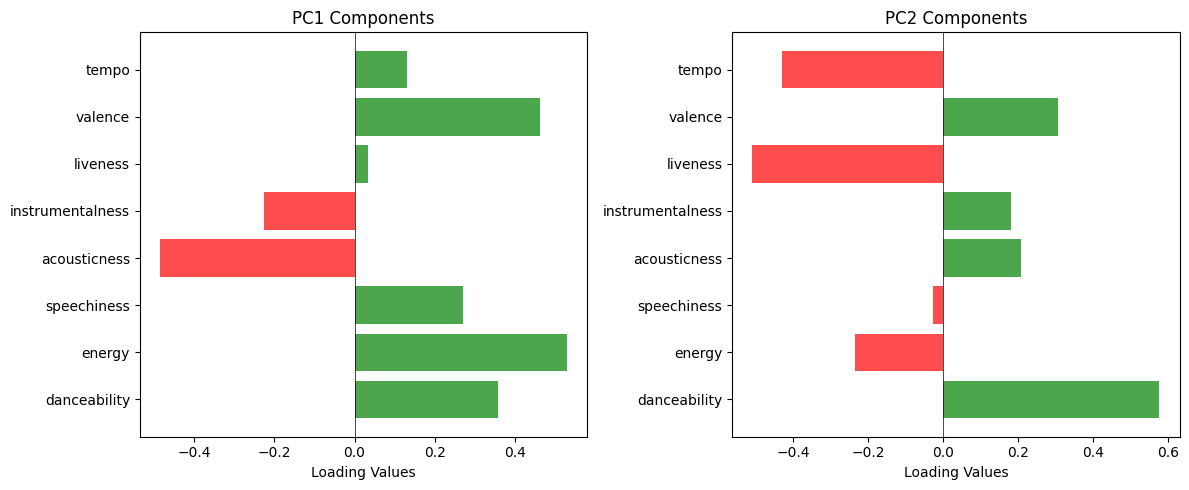


Ï£ºÏÑ±Î∂Ñ Ìï¥ÏÑù:
PC1Ïùò Ï£ºÏöî ÌäπÏÑ±:
  - energy: ÎÜíÏùÑÏàòÎ°ù PC1 Í∞íÏù¥ Ï¶ùÍ∞Ä
  - acousticness: ÎÇÆÏùÑÏàòÎ°ù PC1 Í∞íÏù¥ Ï¶ùÍ∞Ä
  - valence: ÎÜíÏùÑÏàòÎ°ù PC1 Í∞íÏù¥ Ï¶ùÍ∞Ä

PC2Ïùò Ï£ºÏöî ÌäπÏÑ±:
  - danceability: ÎÜíÏùÑÏàòÎ°ù PC2 Í∞íÏù¥ Ï¶ùÍ∞Ä
  - liveness: ÎÇÆÏùÑÏàòÎ°ù PC2 Í∞íÏù¥ Ï¶ùÍ∞Ä
  - tempo: ÎÇÆÏùÑÏàòÎ°ù PC2 Í∞íÏù¥ Ï¶ùÍ∞Ä


In [26]:
if len(df_pca) > 10:
    # PCA Ïã§Ìñâ (2Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜå)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    print("PCA Í≤∞Í≥º:")
    print(f"ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ï∞®Ïõê: {X_scaled.shape[1]}Ï∞®Ïõê")
    print(f"Ï∂ïÏÜåÎêú Îç∞Ïù¥ÌÑ∞ Ï∞®Ïõê: {X_pca.shape[1]}Ï∞®Ïõê")
    
    # ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®
    explained_variance = pca.explained_variance_ratio_
    print(f"\nÍ∞Å Ï£ºÏÑ±Î∂ÑÏù¥ ÏÑ§Î™ÖÌïòÎäî Î∂ÑÏÇ∞:")
    print(f"PC1: {explained_variance[0]*100:.1f}%")
    print(f"PC2: {explained_variance[1]*100:.1f}%")
    print(f"Ï¥ù ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞: {sum(explained_variance)*100:.1f}%")
    
    # Ï£ºÏÑ±Î∂ÑÏùò Íµ¨ÏÑ± ÏöîÏÜå (Î°úÎî©)
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=['PC1', 'PC2'],
        index=pca_features
    )
    
    print("\nÏ£ºÏÑ±Î∂ÑÏùò Íµ¨ÏÑ± ÏöîÏÜå (Î°úÎî©):")
    print(loadings.round(3))
    
    # Î°úÎî© ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    colors1 = ['green' if x > 0 else 'red' for x in loadings['PC1']]
    plt.barh(loadings.index, loadings['PC1'], color=colors1, alpha=0.7)
    plt.title('PC1 Components')
    plt.xlabel('Loading Values')
    plt.axvline(x=0, color='black', linewidth=0.5)
    
    plt.subplot(1, 2, 2)
    colors2 = ['green' if x > 0 else 'red' for x in loadings['PC2']]
    plt.barh(loadings.index, loadings['PC2'], color=colors2, alpha=0.7)
    plt.title('PC2 Components')
    plt.xlabel('Loading Values')
    plt.axvline(x=0, color='black', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Ìï¥ÏÑù
    print("\nÏ£ºÏÑ±Î∂Ñ Ìï¥ÏÑù:")
    top_pc1 = loadings['PC1'].abs().nlargest(3)
    print("PC1Ïùò Ï£ºÏöî ÌäπÏÑ±:")
    for feature in top_pc1.index:
        value = loadings.loc[feature, 'PC1']
        direction = "ÎÜíÏùÑÏàòÎ°ù" if value > 0 else "ÎÇÆÏùÑÏàòÎ°ù"
        print(f"  - {feature}: {direction} PC1 Í∞íÏù¥ Ï¶ùÍ∞Ä")
    
    top_pc2 = loadings['PC2'].abs().nlargest(3)
    print("\nPC2Ïùò Ï£ºÏöî ÌäπÏÑ±:")
    for feature in top_pc2.index:
        value = loadings.loc[feature, 'PC2']
        direction = "ÎÜíÏùÑÏàòÎ°ù" if value > 0 else "ÎÇÆÏùÑÏàòÎ°ù"
        print(f"  - {feature}: {direction} PC2 Í∞íÏù¥ Ï¶ùÍ∞Ä")

### 10.4 PCA Í≥µÍ∞ÑÏóêÏÑú ÏùåÏïÖ ÏãúÍ∞ÅÌôî

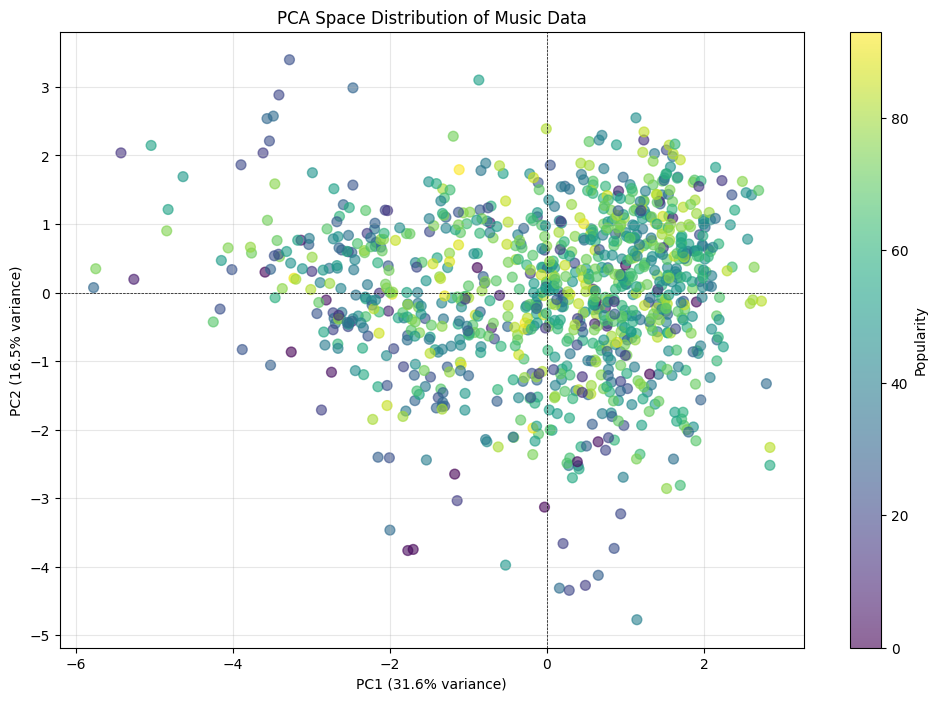

PCA Í≥µÍ∞ÑÏóêÏÑúÏùò ÌäπÏù¥Ï†êÎì§:

PC1 ÏµúÍ≥†Ï†ê: Empire State Of Mind - JAY-Z, Alicia Keys
  ÏúÑÏπò: PC1=2.84, PC2=-2.26

PC1 ÏµúÏ†ÄÏ†ê: Paradis: Sicilienne ÌååÎùºÎîîÏä§ ÏãúÏã§Î¶¨ÏïàÎäê - ÍπÄÏ§ÄÏòÅ
  ÏúÑÏπò: PC1=-5.77, PC2=0.07

PC2 ÏµúÍ≥†Ï†ê: ÎòëÍ∞ôÏïÑÏöî - Ïò§Î•¥Í≥® Version - Ïò§Î•¥Í≥® ÏóîÏ†§
  ÏúÑÏπò: PC1=-3.28, PC2=3.40

ÏµúÍ≥† Ïù∏Í∏∞Í≥°: DAISIES - Justin Bieber
  ÏúÑÏπò: PC1=-1.12, PC2=1.79
  Ïù∏Í∏∞ÎèÑ: 93


In [27]:
if len(df_pca) > 10:
    # PCA Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
    pca_df = df_pca.copy()
    pca_df['PC1'] = X_pca[:, 0]
    pca_df['PC2'] = X_pca[:, 1]
    
    # Ï†ÑÏ≤¥ ÏùåÏïÖ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 8))
    
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                         alpha=0.6, s=50, c=pca_df['popularity'], 
                         cmap='viridis')
    
    plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)')
    plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)')
    plt.title('PCA Space Distribution of Music Data')
    plt.colorbar(scatter, label='Popularity')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
    
    plt.show()
    
    # Ïù∏Í∏∞ Í≥°Îì§ ÌôïÏù∏
    print("PCA Í≥µÍ∞ÑÏóêÏÑúÏùò ÌäπÏù¥Ï†êÎì§:")
    
    # PC1Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Í≥°
    max_pc1 = pca_df.loc[pca_df['PC1'].idxmax()]
    print(f"\nPC1 ÏµúÍ≥†Ï†ê: {max_pc1['name']} - {max_pc1['artist']}")
    print(f"  ÏúÑÏπò: PC1={max_pc1['PC1']:.2f}, PC2={max_pc1['PC2']:.2f}")
    
    # PC1Ïù¥ Í∞ÄÏû• ÎÇÆÏùÄ Í≥°
    min_pc1 = pca_df.loc[pca_df['PC1'].idxmin()]
    print(f"\nPC1 ÏµúÏ†ÄÏ†ê: {min_pc1['name']} - {min_pc1['artist']}")
    print(f"  ÏúÑÏπò: PC1={min_pc1['PC1']:.2f}, PC2={min_pc1['PC2']:.2f}")
    
    # PC2Í∞Ä Í∞ÄÏû• ÎÜíÏùÄ Í≥°
    max_pc2 = pca_df.loc[pca_df['PC2'].idxmax()]
    print(f"\nPC2 ÏµúÍ≥†Ï†ê: {max_pc2['name']} - {max_pc2['artist']}")
    print(f"  ÏúÑÏπò: PC1={max_pc2['PC1']:.2f}, PC2={max_pc2['PC2']:.2f}")
    
    # Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî Í≥°
    most_popular = pca_df.loc[pca_df['popularity'].idxmax()]
    print(f"\nÏµúÍ≥† Ïù∏Í∏∞Í≥°: {most_popular['name']} - {most_popular['artist']}")
    print(f"  ÏúÑÏπò: PC1={most_popular['PC1']:.2f}, PC2={most_popular['PC2']:.2f}")
    print(f"  Ïù∏Í∏∞ÎèÑ: {most_popular['popularity']}")

### 10.5 PCAÎ•º ÌôúÏö©Ìïú ÏùåÏïÖ Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù

üéµ '1v520W6rEa0nB2vvqAxnU3' IDÎ•º Í∞ÄÏßÑ Í≥°Í≥º Ïú†ÏÇ¨Ìïú Ìä∏ÎûôÎì§:

Í∏∞Ï§Ä Í≥°: WITCH (Feat. Jay Park, So!YoON!) (Prod. by Slom) - Lee Young Ji, Jay Park, So!YoON!
Spotify ID: 1v520W6rEa0nB2vvqAxnU3
ÏúÑÏπò: PC1=1.01, PC2=0.87
Ïù∏Í∏∞ÎèÑ: 44

Ïú†ÏÇ¨Ìïú Í≥°Îì§:
  0.054 - GIRLS by CHANMINA
    Spotify ID: 7DQYAPZsNdmwh2Si3oEutP (Ïù∏Í∏∞ÎèÑ: 49)
  0.079 - New Face by PSY
    Spotify ID: 25YgkxnU4UzEG4ORni69Rw (Ïù∏Í∏∞ÎèÑ: 55)
  0.088 - Good Graces by Sabrina Carpenter
    Spotify ID: 102YUQbYmwdBXS7jwamI90 (Ïù∏Í∏∞ÎèÑ: 79)
  0.098 - OH MAN by Justin Bieber
    Spotify ID: 6PlDfaiu0l777DqPolHkDQ (Ïù∏Í∏∞ÎèÑ: 69)
  0.125 - Smooth Criminal - 2012 Remaster by Michael Jackson
    Spotify ID: 2bCQHF9gdG5BNDVuEIEnNk (Ïù∏Í∏∞ÎèÑ: 73)


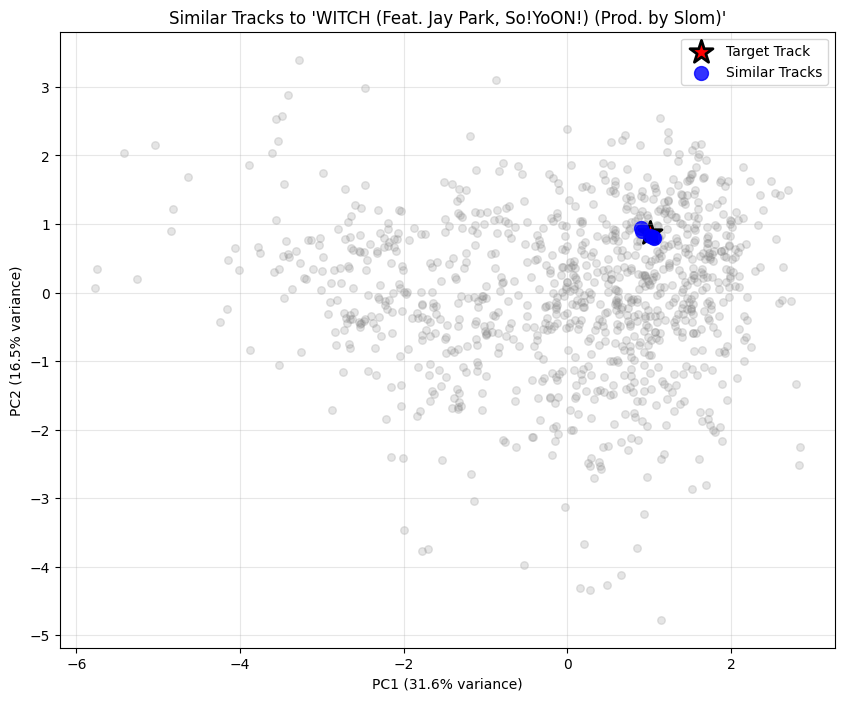


üí° ÏÇ¨Ïö©Î≤ï:
find_similar_tracks_pca('your_spotify_id', pca_df, top_n=5)

üí° PCAÏùò ÌôúÏö©:
- Spotify ID Í∏∞Î∞ò ÏùåÏïÖ Ï∂îÏ≤ú ÏãúÏä§ÌÖú
- Ïú†ÏÇ¨Ìïú ÏùåÏïÖÎì§Ïù¥ Í∞ÄÍπåÏö¥ ÏúÑÏπòÏóê Î™®Ïó¨ÏûàÏùå
- ÏùåÏïÖ Ï∂îÏ≤ú ÏãúÏä§ÌÖúÏùò Í∏∞Ï¥à ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú ÌôúÏö© Í∞ÄÎä•
- ÏÉàÎ°úÏö¥ ÏùåÏïÖÏùò Ïû•Î•¥ÎÇò ÌäπÏÑ±ÏùÑ ÏòàÏ∏°Ìï† Ïàò ÏûàÏùå


In [31]:
if len(df_pca) > 10:
    def find_similar_tracks_pca(spotify_id: str, pca_df: pd.DataFrame, top_n: int = 5):
        """PCA Í≥µÍ∞ÑÏóêÏÑú ÌäπÏ†ï Spotify IDÏôÄ Í∞ÄÏû• Ïú†ÏÇ¨Ìïú Ìä∏Îûô Ï∞æÍ∏∞"""
        
        # ÌÉÄÍ≤ü Ìä∏Îûô Ï∞æÍ∏∞
        target_tracks = pca_df[pca_df['spotify_id'] == spotify_id]
        
        if len(target_tracks) == 0:
            print(f"'{spotify_id}' Spotify IDÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
            return None, None
        
        target = target_tracks.iloc[0]
        target_pc1 = target['PC1']
        target_pc2 = target['PC2']
        
        # Î™®Îì† Ìä∏ÎûôÍ≥ºÏùò Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ Í≥ÑÏÇ∞
        distances = np.sqrt((pca_df['PC1'] - target_pc1)**2 + 
                           (pca_df['PC2'] - target_pc2)**2)
        
        # ÏûêÍ∏∞ ÏûêÏã†ÏùÑ Ï†úÏô∏ÌïòÍ≥† Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ìä∏ÎûôÎì§
        pca_df_copy = pca_df.copy()
        pca_df_copy['distance'] = distances
        similar = pca_df_copy[pca_df_copy['spotify_id'] != spotify_id].nsmallest(top_n, 'distance')
        
        return target, similar
    
    # ÏòàÏãú: Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïóê ÏûàÎäî Ìä∏Îûô Ï§ë ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌï¥ÏÑú Ïú†ÏÇ¨Ìïú Í≥° Ï∞æÍ∏∞
    if len(pca_df) > 5:
        # Ï≤´ Î≤àÏß∏ Ìä∏ÎûôÏùò Spotify ID ÏÇ¨Ïö©
        sample_spotify_id = pca_df.iloc[0]['spotify_id']
        
        print(f"üéµ '{sample_spotify_id}' IDÎ•º Í∞ÄÏßÑ Í≥°Í≥º Ïú†ÏÇ¨Ìïú Ìä∏ÎûôÎì§:")
        target, similar = find_similar_tracks_pca(sample_spotify_id, pca_df, top_n=5)
        
        if target is not None:
            print(f"\nÍ∏∞Ï§Ä Í≥°: {target['name']} - {target['artist']}")
            print(f"Spotify ID: {target['spotify_id']}")
            print(f"ÏúÑÏπò: PC1={target['PC1']:.2f}, PC2={target['PC2']:.2f}")
            print(f"Ïù∏Í∏∞ÎèÑ: {target['popularity']}")
            
            print("\nÏú†ÏÇ¨Ìïú Í≥°Îì§:")
            for idx, row in similar.iterrows():
                print(f"  {row['distance']:.3f} - {row['name']} by {row['artist']}")
                print(f"    Spotify ID: {row['spotify_id']} (Ïù∏Í∏∞ÎèÑ: {row['popularity']})")
            
            # ÏãúÍ∞ÅÌôî
            plt.figure(figsize=(10, 8))
            
            # Î™®Îì† Í≥° (ÌöåÏÉâ, ÏûëÍ≤å)
            plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.2, s=30, c='gray')
            
            # ÌÉÄÍ≤ü Í≥° (Îπ®Í∞Ñ Î≥Ñ)
            plt.scatter(target['PC1'], target['PC2'], s=300, c='red', 
                       marker='*', edgecolor='black', linewidth=2, label='Target Track')
            
            # Ïú†ÏÇ¨Ìïú Í≥°Îì§ (ÌååÎûÄ Ïõê)
            plt.scatter(similar['PC1'], similar['PC2'], s=100, c='blue',
                       alpha=0.8, label='Similar Tracks')
            
            # Ïó∞Í≤∞ÏÑ†
            for idx, row in similar.iterrows():
                plt.plot([target['PC1'], row['PC1']], 
                        [target['PC2'], row['PC2']], 
                        'b--', alpha=0.3, linewidth=1)
            
            plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)')
            plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)')
            plt.title(f"Similar Tracks to '{target['name']}'")
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            plt.show()
        
        print("\nüí° ÏÇ¨Ïö©Î≤ï:")
        print("find_similar_tracks_pca('your_spotify_id', pca_df, top_n=5)")
        print("\nüí° PCAÏùò ÌôúÏö©:")
        print("- Spotify ID Í∏∞Î∞ò ÏùåÏïÖ Ï∂îÏ≤ú ÏãúÏä§ÌÖú")
        print("- Ïú†ÏÇ¨Ìïú ÏùåÏïÖÎì§Ïù¥ Í∞ÄÍπåÏö¥ ÏúÑÏπòÏóê Î™®Ïó¨ÏûàÏùå") 
        print("- ÏùåÏïÖ Ï∂îÏ≤ú ÏãúÏä§ÌÖúÏùò Í∏∞Ï¥à ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú ÌôúÏö© Í∞ÄÎä•")
        print("- ÏÉàÎ°úÏö¥ ÏùåÏïÖÏùò Ïû•Î•¥ÎÇò ÌäπÏÑ±ÏùÑ ÏòàÏ∏°Ìï† Ïàò ÏûàÏùå")